In [8]:
!pip install kmodes

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from kmodes.kmodes import KModes
from kmodes.kprototypes import KPrototypes
import warnings
warnings.filterwarnings('ignore')

In [10]:
import pandas as pd

file_path = "Project datasets/"
file_name = "D2.csv"
df2 = pd.read_csv(f"{file_path}{file_name}")
df2

,gender,age,height,weight,blood_type,insurance,income,race,immigrant,smoking,alcohol,contacts_count,house_count,working,worried,covid19_positive
0,male,30_40,174,64,bp,yes,med,white,native,never,3.0132,7.725594,2.0,never,4,1
1,male,30_40,182,118,unknown,yes,med,white,native,never,0.0000,7.725594,3.0,never,4,1
2,male,30_40,184,118,unknown,yes,med,white,native,never,0.0000,7.725594,3.0,never,4,1
3,female,70_80,164,72,unknown,yes,med,white,native,never,14.0000,7.725594,3.0,never,4,1
4,male,30_40,192,92,unknown,yes,med,white,native,never,0.0000,7.725594,1.0,never,4,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6105,male,40_50,174,72,unknown,yes,med,white,native,yesheavy,3.0132,5.000000,3.0,travel critical,5,0
6106,female,20_30,164,130,on,no,med,white,native,never,3.0132,21.000000,4.0,never,5,0
6107,female,20_30,162,56,bp,yes,low,mixed,native,vape,0.0000,10.000000,3.0,travel non critical,3,0
6108,female,40_50,158,70,bp,yes,med,asian,immigrant,quit5,3.0132,14.000000,1.0,travel critical,5,0


In [3]:
df2[['contacts_count', 'alcohol', 'house_count']] = df2[['contacts_count', 'alcohol', 'house_count']].astype(int)

df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6110 entries, 0 to 6109
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   gender            6110 non-null   object
 1   age               6110 non-null   object
 2   height            6110 non-null   int64 
 3   weight            6110 non-null   int64 
 4   blood_type        6110 non-null   object
 5   insurance         6110 non-null   object
 6   income            6110 non-null   object
 7   race              6110 non-null   object
 8   immigrant         6110 non-null   object
 9   smoking           6110 non-null   object
 10  alcohol           6110 non-null   int64 
 11  contacts_count    6110 non-null   int64 
 12  house_count       6110 non-null   int64 
 13  working           6110 non-null   object
 14  worried           6110 non-null   int64 
 15  covid19_positive  6110 non-null   int64 
dtypes: int64(7), object(9)
memory usage: 763.9+ KB


In [4]:
# Filter the DataFrame based on the 'covid19_positive' column
covidpositive_df = df2[df2['covid19_positive'] == 1] 
covidpositive_df

,gender,age,height,weight,blood_type,insurance,income,race,immigrant,smoking,alcohol,contacts_count,house_count,working,worried,covid19_positive
0,male,30_40,174,64,bp,yes,med,white,native,never,3,7,2,never,4,1
1,male,30_40,182,118,unknown,yes,med,white,native,never,0,7,3,never,4,1
2,male,30_40,184,118,unknown,yes,med,white,native,never,0,7,3,never,4,1
3,female,70_80,164,72,unknown,yes,med,white,native,never,14,7,3,never,4,1
4,male,30_40,192,92,unknown,yes,med,white,native,never,0,7,1,never,4,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5778,female,50_60,176,72,unknown,no,med,white,native,never,3,6,2,travel critical,4,1
5779,female,70_80,154,58,unknown,yes,high,white,native,never,5,7,2,home,4,1
5780,male,20_30,176,96,unknown,yes,med,hispanic,native,never,3,2,3,never,4,1
5781,female,60_70,164,70,unknown,yes,high,white,native,never,2,3,3,never,2,1


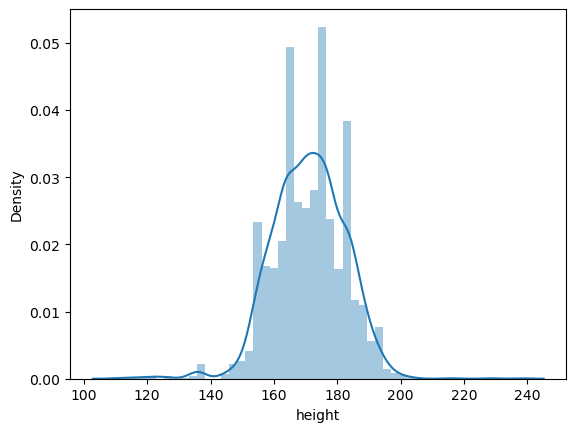

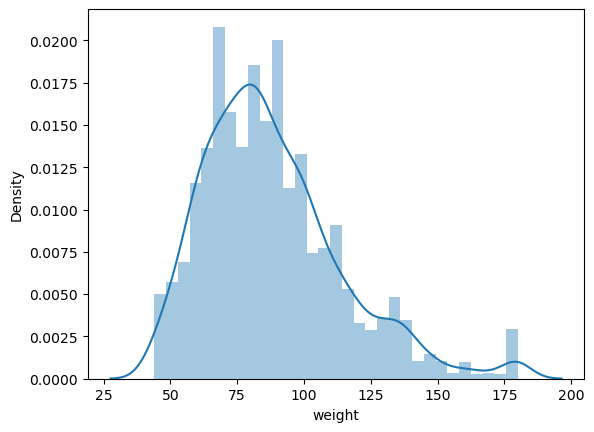

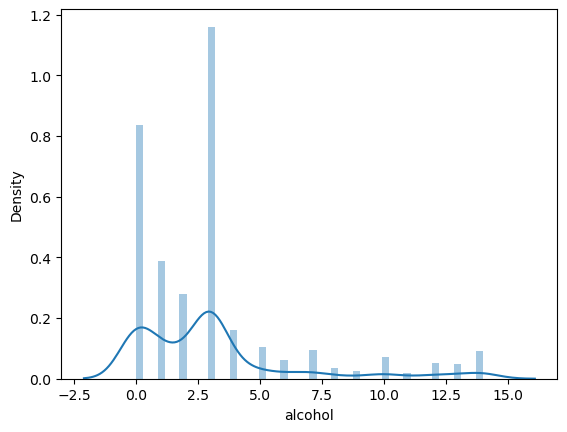

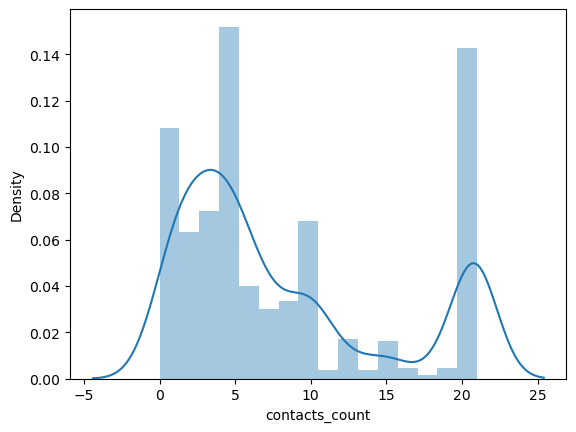

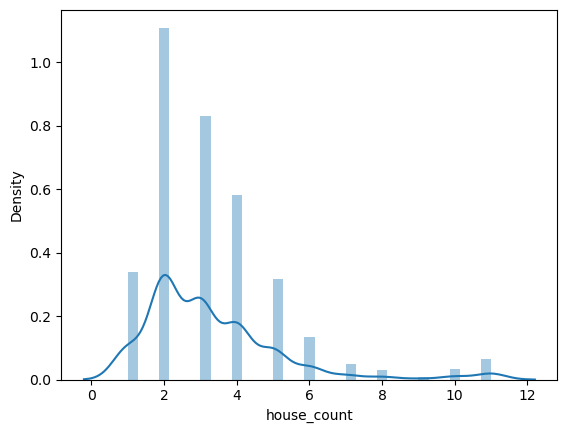

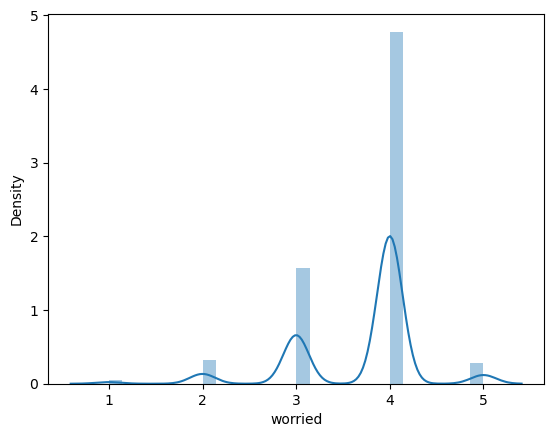

In [11]:
# Distribution of height
height_dist = sns.distplot(covidpositive_df['height'].dropna())
plt.show()

# Distribution of weight
weight_dist = sns.distplot(covidpositive_df['weight'].dropna())
plt.show()

# Distribution of alcohol
alcohol_dist = sns.distplot(covidpositive_df['alcohol'].dropna())
plt.show()

contacts_count_dist = sns.distplot(covidpositive_df['contacts_count'].dropna())
plt.show()

house_count_dist = sns.distplot(covidpositive_df['house_count'].dropna())
plt.show()

worried_dist = sns.distplot(covidpositive_df['worried'].dropna())
plt.show()

In [12]:
def drawBoxplot(col):
    sns.boxplot(covidpositive_df[col])
    plt.title(col)
    plt.show()

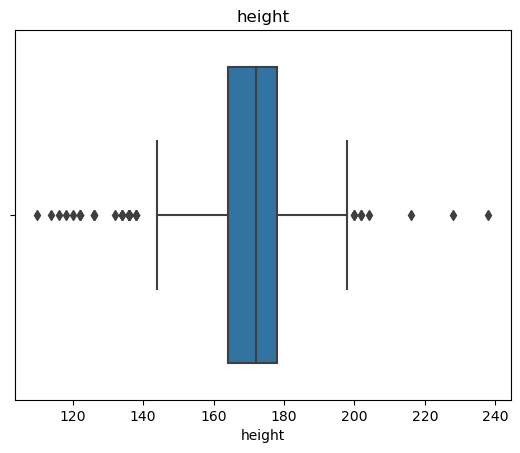

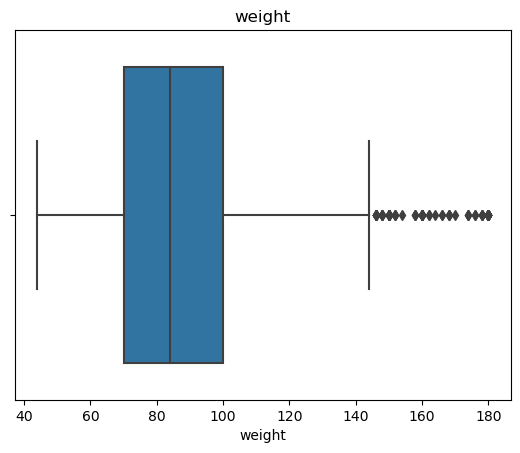

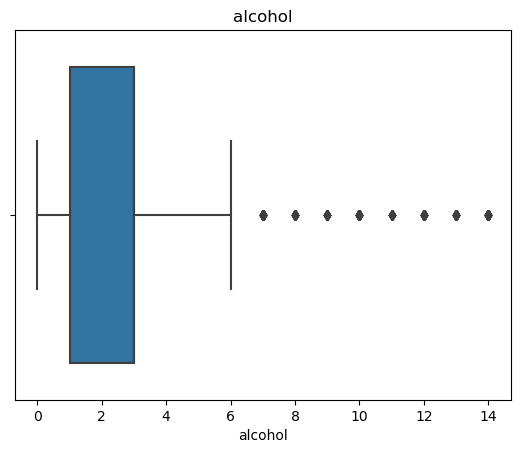

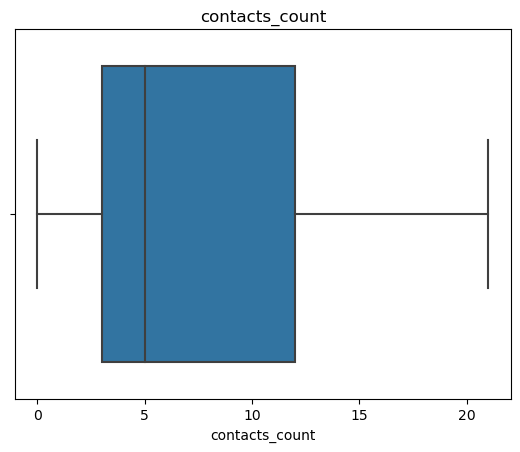

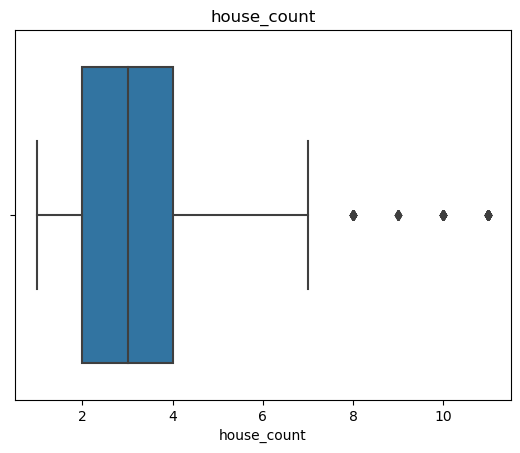

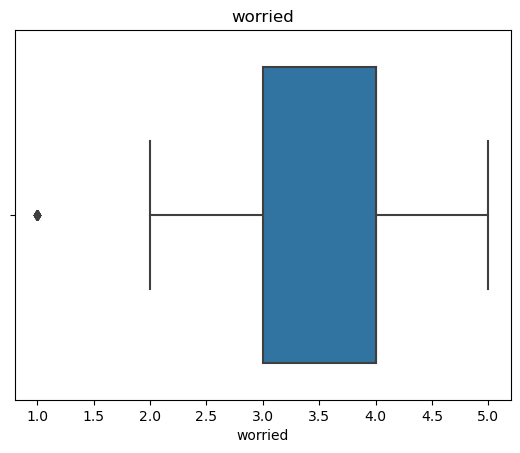

In [13]:
drawBoxplot("height")
drawBoxplot("weight")
drawBoxplot("alcohol")
drawBoxplot("contacts_count")
drawBoxplot("house_count")
drawBoxplot("worried")

In [14]:
filtered_df = covidpositive_df[['height', 'contacts_count', 'house_count','weight','worried','alcohol']]
filtered_df

,height,contacts_count,house_count,weight,worried,alcohol
0,174,7,2,64,4,3
1,182,7,3,118,4,0
2,184,7,3,118,4,0
3,164,7,3,72,4,14
4,192,7,1,92,4,0
...,...,...,...,...,...,...
5778,176,6,2,72,4,3
5779,154,7,2,58,4,5
5780,176,2,3,96,4,3
5781,164,3,3,70,2,2


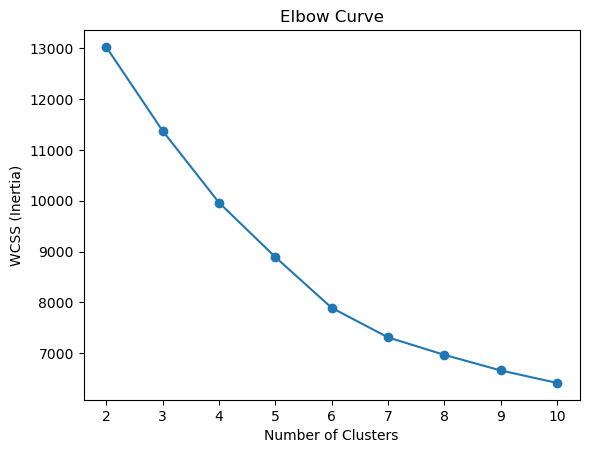

In [5]:
# Select relevant columns for clustering
X = covidpositive_df[['height', 'weight', 'alcohol', 'house_count', 'contacts_count', 'worried']]

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Perform clustering for different numbers of clusters
num_clusters = range(2, 11)
cluster_scores = []

for n in num_clusters:
    kmeans = KMeans(n_clusters=n, random_state=42)
    kmeans.fit(X_scaled)
    cluster_scores.append(kmeans.inertia_)

# Plot the elbow curve
plt.plot(num_clusters, cluster_scores, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS (Inertia)')
plt.title('Elbow Curve')
plt.show()

In [6]:
# Perform clustering for different numbers of clusters
num_clusters = [3,4,5,6,7]  
clusters = {}

for n in num_clusters:
    kmeans = KMeans(n_clusters=n, random_state=42)
    kmeans.fit(X_scaled)
    clusters[n] = kmeans

# Calculate and print the silhouette scores for each number of clusters
for n, cluster in clusters.items():
    silhouette_avg = silhouette_score(X_scaled, cluster.labels_)
    print(f"Number of clusters: {n}")
    print("Silhouette score:", silhouette_avg)
    print()

Number of clusters: 3
Silhouette score: 0.16186031263464917

Number of clusters: 4
Silhouette score: 0.18116311862379128

Number of clusters: 5
Silhouette score: 0.19727992205252445

Number of clusters: 6
Silhouette score: 0.20653557926819147

Number of clusters: 7
Silhouette score: 0.19330503026490872



In [7]:
# Select relevant columns for clustering
X = covidpositive_df[['height', 'weight', 'alcohol', 'house_count', 'contacts_count', 'worried']]

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Perform clustering with K-means
kmeans = KMeans(n_clusters=6, random_state=42)
kmeans.fit(X_scaled)

# Assign cluster labels to the data points
covidpositive_df['Cluster'] = kmeans.labels_

# Analyze the clusters
cluster_counts = covidpositive_df['Cluster'].value_counts()
cluster_centers = scaler.inverse_transform(kmeans.cluster_centers_)

# Print the number of samples in each cluster
print("Cluster Counts:")
print(cluster_counts)

# Print the cluster centers
print("\nCluster Centers:")
print(cluster_centers)

Cluster Counts:
1    696
4    625
3    433
2    426
5    239
0    123
Name: Cluster, dtype: int64

Cluster Centers:
[[167.33333333  87.28455285   3.10569106   9.43089431  12.28455285
    3.64227642]
 [161.98848921  69.39280576   2.2057554    2.94100719   4.31223022
    3.95251799]
 [174.41784038  89.47887324   2.30985915   3.           7.04225352
    2.69014085]
 [171.44239631  87.25345622   2.21889401   3.04608295  19.97926267
    3.84101382]
 [178.3712     106.9664       1.9824       3.0256       4.7248
    4.0256    ]
 [173.23849372  92.34309623  11.49372385   2.76987448   6.78661088
    3.71548117]]


Cluster membership
1    696
4    625
3    433
2    426
5    239
0    123
Name: Cluster_ID, dtype: int64


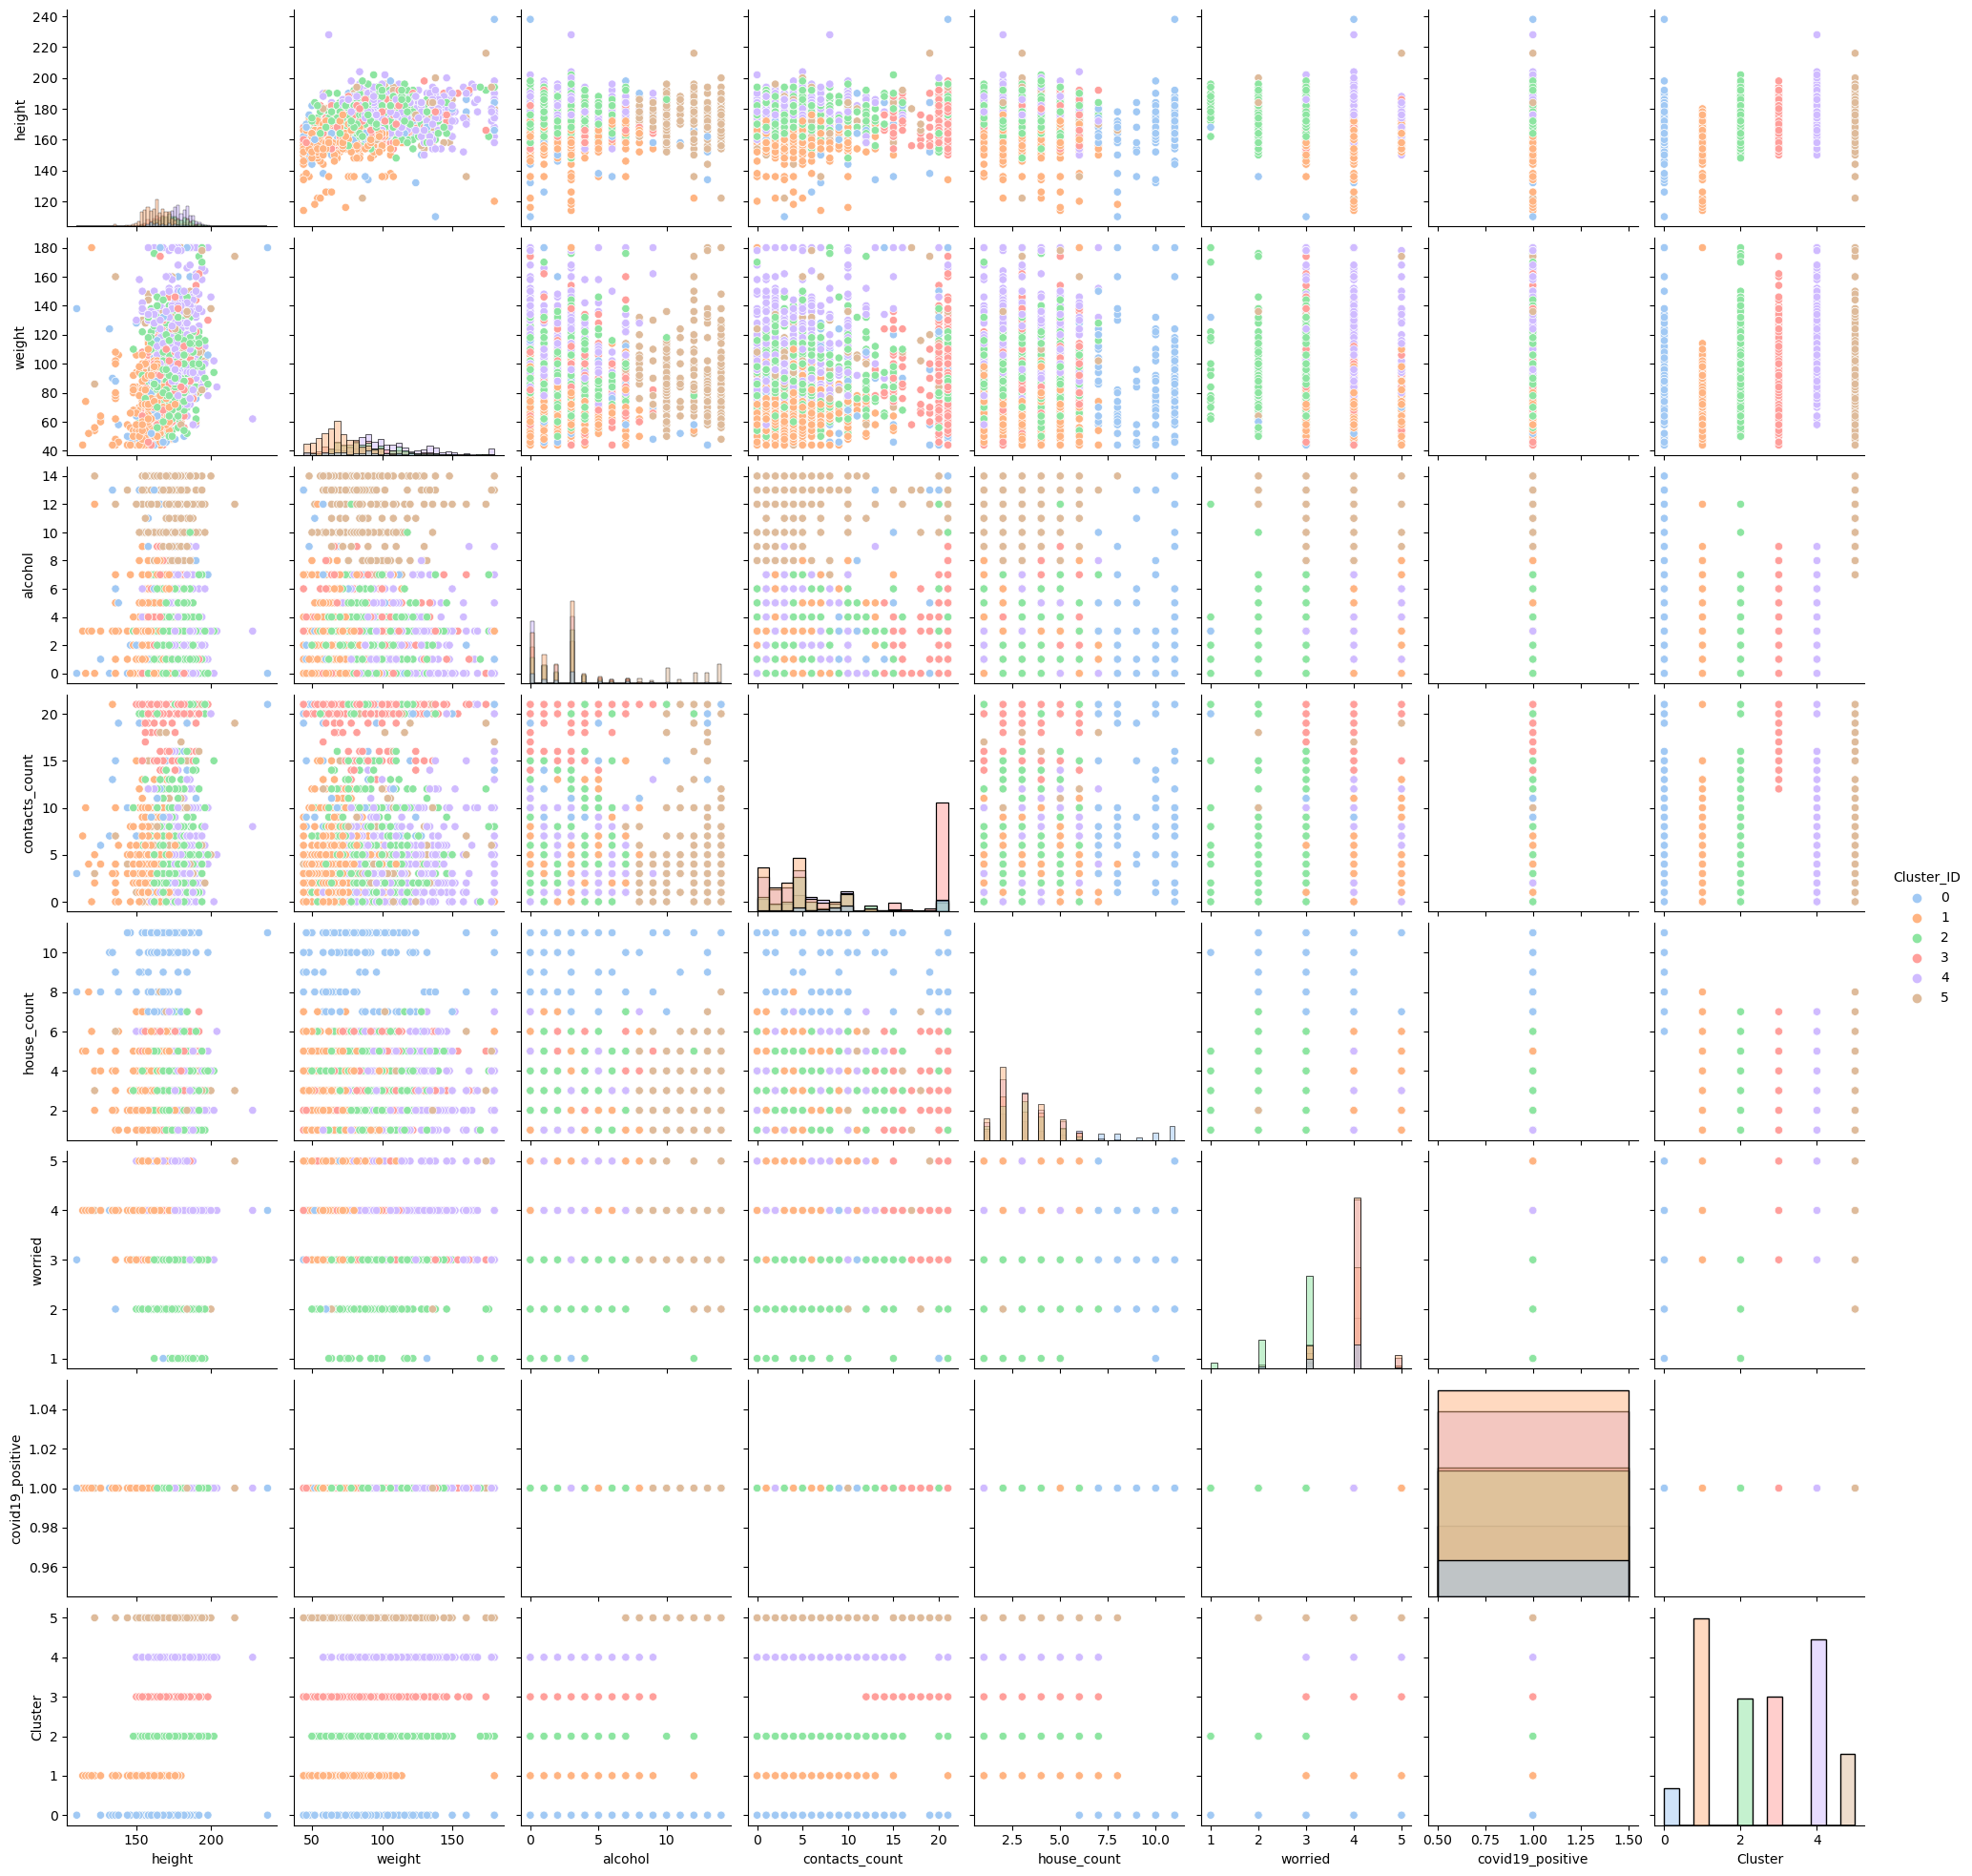

In [8]:
# Assign cluster labels to the data points
covidpositive_df['Cluster_ID'] = kmeans.labels_

# How many records are in each cluster
print("Cluster membership")
print(covidpositive_df['Cluster_ID'].value_counts())

# Pairplot the cluster distribution
cluster_g = sns.pairplot(covidpositive_df, hue='Cluster_ID', diag_kind='hist',palette='pastel')
plt.show()

# Example
cluster_g.savefig('pairplot.png')

In [9]:
# Set a different n_clusters
model = KMeans(n_clusters=8, random_state=42)
model.fit(X)

# Sum of intra-cluster distances
print("Sum of intra-cluster distance:", model.inertia_)
print("Centroid locations:")
for centroid in model.cluster_centers_:
    print(centroid)

Sum of intra-cluster distance: 409430.4216705233
Centroid locations:
[180.03448276 172.55172414   3.5          3.65517241   9.10344828
   3.63793103]
[180.65731463  85.5991984    3.31462926   3.2004008    7.88376754
   3.6492986 ]
[173.9009009  133.98198198   3.11261261   3.34684685   8.01801802
   3.76126126]
[167.28301887  69.53773585   2.76886792   3.41981132  19.96226415
   3.62264151]
[169.27095517  70.51851852   3.15984405   3.10721248   4.50487329
   3.71150097]
[162.02469136  94.10493827   2.92592593   3.29012346   8.19135802
   3.75      ]
[179.25581395 107.97932817   3.24289406   3.34625323   8.56072351
   3.66666667]
[157.16819572  55.6941896    2.71865443   3.44036697   6.12232416
   3.78899083]


Distribution for cluster 0
Distribution for cluster 1
Distribution for cluster 2
Distribution for cluster 3
Distribution for cluster 4
Distribution for cluster 5


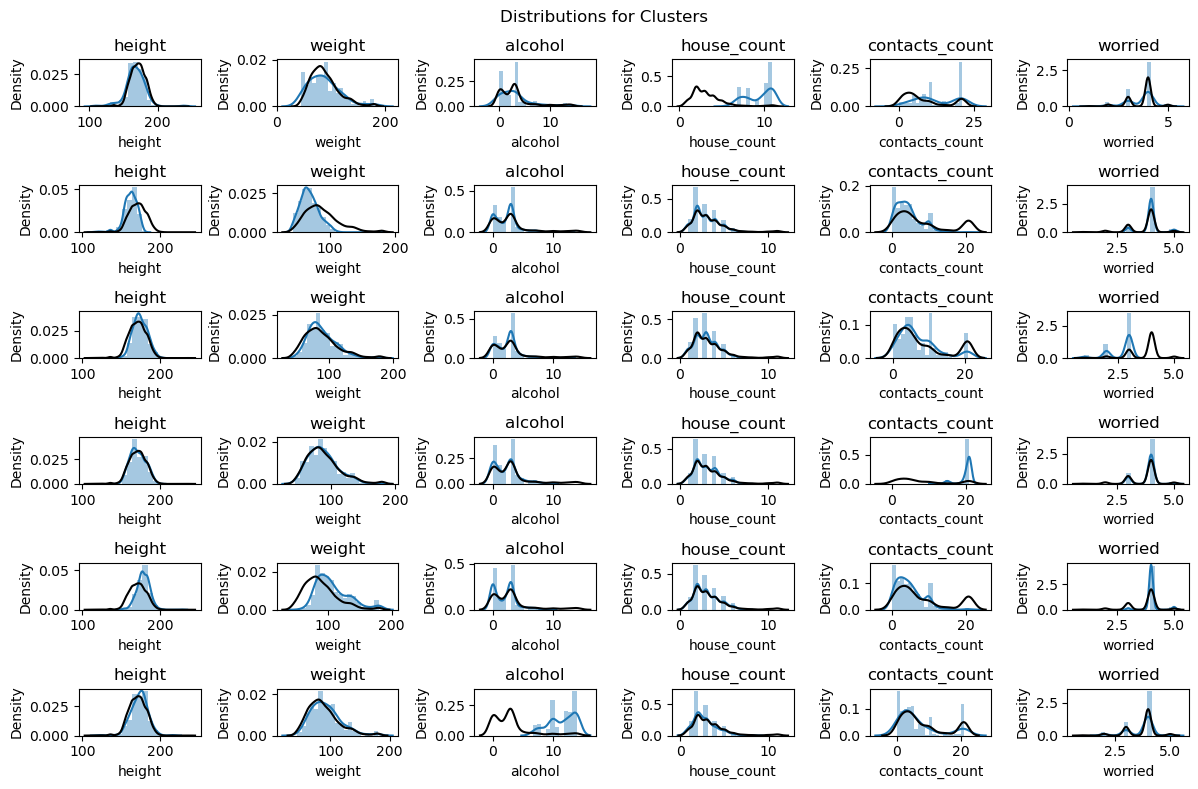

In [10]:
cols = ['height', 'weight', 'alcohol', 'house_count', 'contacts_count', 'worried']
n_bins = 20

# Inspecting clusters 0,1,2,3, 4, and 5
clusters_to_inspect = [0,1,2,3, 4, 5]
num_clusters = len(clusters_to_inspect)

# Create subplots for each cluster
fig, axes = plt.subplots(num_clusters, len(cols), figsize=(12, 8))
fig.suptitle("Distributions for Clusters")

for i, cluster in enumerate(clusters_to_inspect):
    print("Distribution for cluster {}".format(cluster))
    
    for j, col in enumerate(cols):
        # Create the bins
        bins = np.linspace(min(covidpositive_df[col]), max(covidpositive_df[col]), 20)

        # Plot distribution of the cluster using histogram
        sns.distplot(covidpositive_df[covidpositive_df['Cluster_ID'] == cluster][col], bins=bins, ax=axes[i, j], norm_hist=True)
             
        # Plot the normal distribution with a black line
        sns.distplot(covidpositive_df[col], bins=bins, ax=axes[i, j], hist=False, color="k")

        axes[i, j].set_title(col)

plt.tight_layout()
plt.show()

In [11]:
# Filter the DataFrame based on the 'covid19_positive' column
covidpositive_df = df2[df2['covid19_positive'] == 1] 

cat_df = covidpositive_df[['height', 'contacts_count', 'house_count','weight','worried','alcohol','age']]

# mapping
age_map = {'0_10':1, '10_20': 2, '20_30': 3, '30_40': 4, '40_50': 5, '50_60': 6, '60_70': 7, '70_80': 8, '80_90':9, '90_100':1, '100_110':11}
cat_df['age'] = cat_df['age'].map(age_map)
                 
# convert df to matrix
X = cat_df.to_numpy()
                 
# scaling
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [15]:
# List to save the clusters and cost
clusters = []
cost_vals = []

# This whole process should take a while
for k in range(2, 20, 2):
    # Train clustering with the specified K
    model = KPrototypes(n_clusters=k, random_state=42, n_jobs=10)
    model.fit_predict(X, categorical=[1])
    
    # Append model to cluster list
    clusters.append(model)
    cost_vals.append(model.cost_)

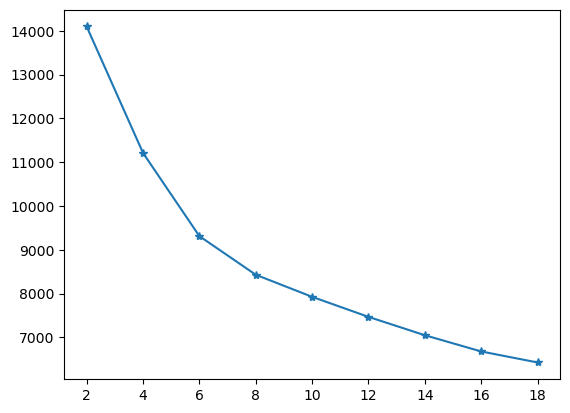

In [16]:
# plot the cost vs K values
plt.plot(range(2,20,2), cost_vals, marker='*')
plt.show()

In [18]:
X_num = [[row[0],row[1], row[2],row[3], row[4],row[5]] for row in X] # Variables of X with numeric datatype
X_cat = [[row[6]] for row in X] # variables of X with categorical datatype

In [20]:
# Calculate the Silhouette Score for the numeric and categorical variables seperately
silScoreNums = silhouette_score(X_num, model.fit_predict(X,categorical=[6]), metric='euclidean')
print("Silscore for numeric variables: " + str(silScoreNums))
silScoreCats = silhouette_score(X_cat, model.fit_predict(X,categorical=[6]), metric='hamming') # note the metric here defined to `hamming`
print("Silscore for categorical variables: " + str(silScoreCats))

# Average the silhouette scores
silScore = (silScoreNums + silScoreCats) / 2
print("The avg silhouette score: " + str(silScore))

model = clusters[1]
silScoreNums = silhouette_score(X_num, model.fit_predict(X,categorical=[6]), metric='euclidean')
silScoreCats = silhouette_score(X_cat, model.fit_predict(X,categorical=[6]), metric='hamming') 
silScore = (silScoreNums + silScoreCats) / 2
print("The avg Silhouette score for k=4: " + str(silScore))

model = clusters[2]
silScoreNums = silhouette_score(X_num, model.fit_predict(X,categorical=[6]), metric='euclidean')
silScoreCats = silhouette_score(X_cat, model.fit_predict(X,categorical=[6]), metric='hamming')
silScore = (silScoreNums + silScoreCats) / 2
print("The avg Silhouette score for k=6: " + str(silScore))

model = clusters[3]
silScoreNums = silhouette_score(X_num, model.fit_predict(X,categorical=[6]), metric='euclidean')
silScoreCats = silhouette_score(X_cat, model.fit_predict(X,categorical=[6]), metric='hamming') 
silScore = (silScoreNums + silScoreCats) / 2
print("The avg Silhouette score for k=8: " + str(silScore))

Silscore for numeric variables: 0.16615079232229815
Silscore for categorical variables: -0.12609499220461556
The avg silhouette score: 0.020027900058841294
The avg Silhouette score for k=4: 0.07626527172125783
The avg Silhouette score for k=6: 0.0765746876123026
The avg Silhouette score for k=8: 0.062341432226268374


Cluster membership
2    688
5    620
1    439
3    433
0    240
4    122
Name: Cluster_ID, dtype: int64


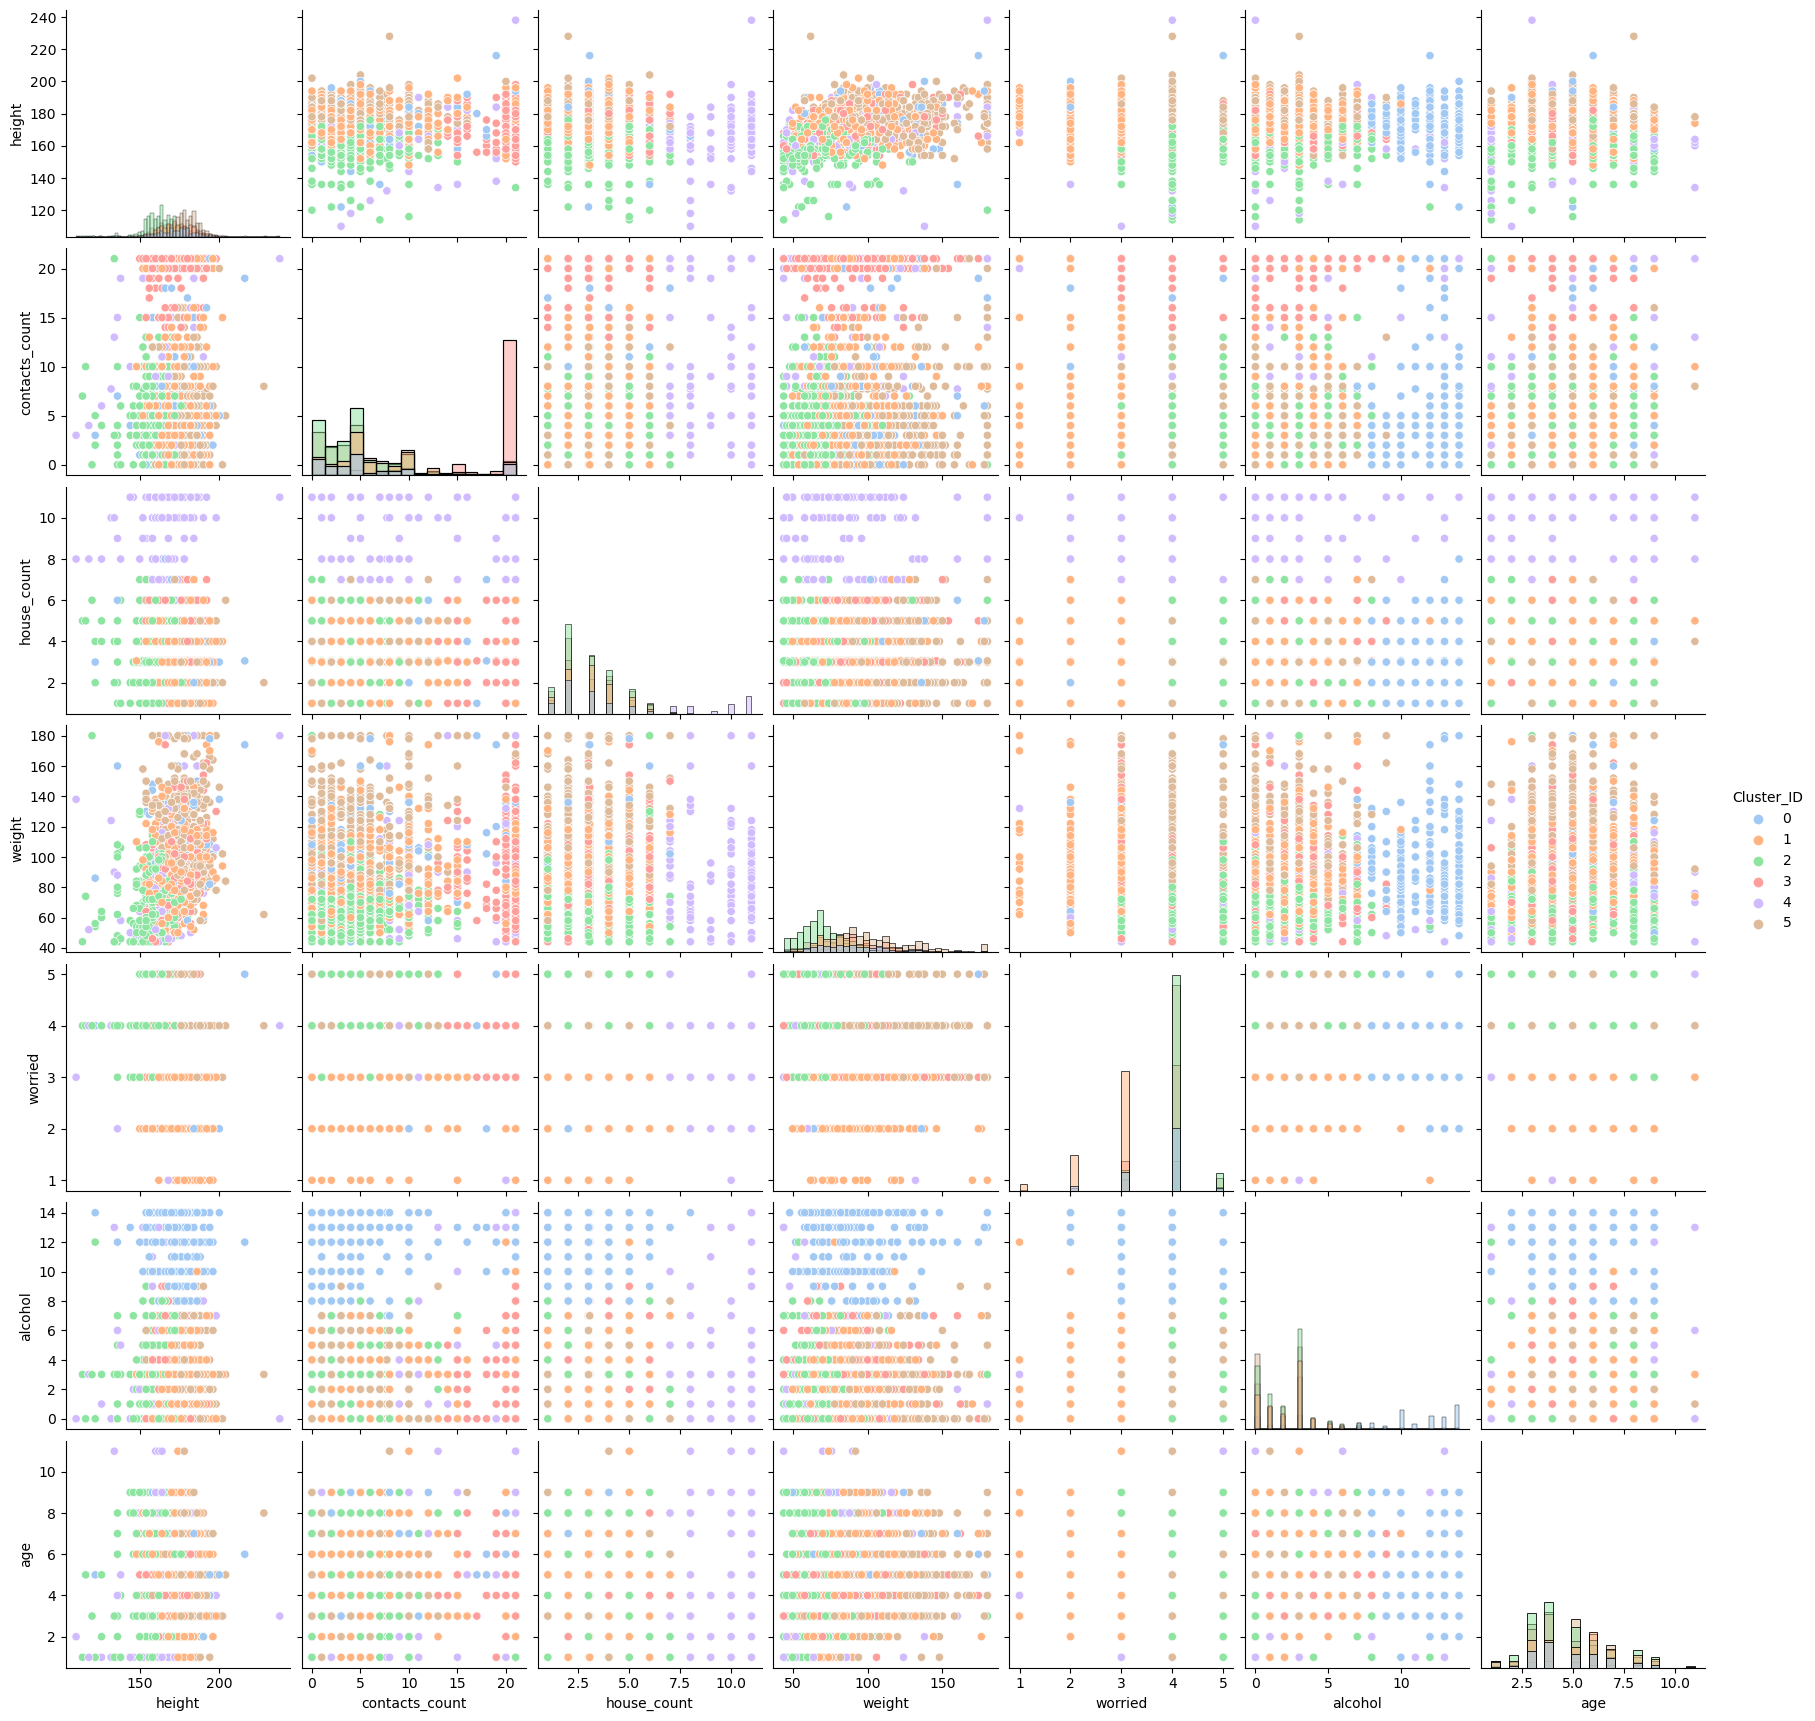

In [24]:
model = clusters[2]
y=model.fit_predict(X, categorical=[6]) 
cat_df['Cluster_ID'] = y

# how many records are in each cluster
print("Cluster membership")
print(cat_df['Cluster_ID'].value_counts())
# pairplot the cluster distribution.
cluster_g = sns.pairplot(cat_df, hue='Cluster_ID',diag_kind='hist',palette='pastel')
plt.show()

Distribution for cluster 0
Distribution for cluster 1
Distribution for cluster 2
Distribution for cluster 3
Distribution for cluster 4
Distribution for cluster 5


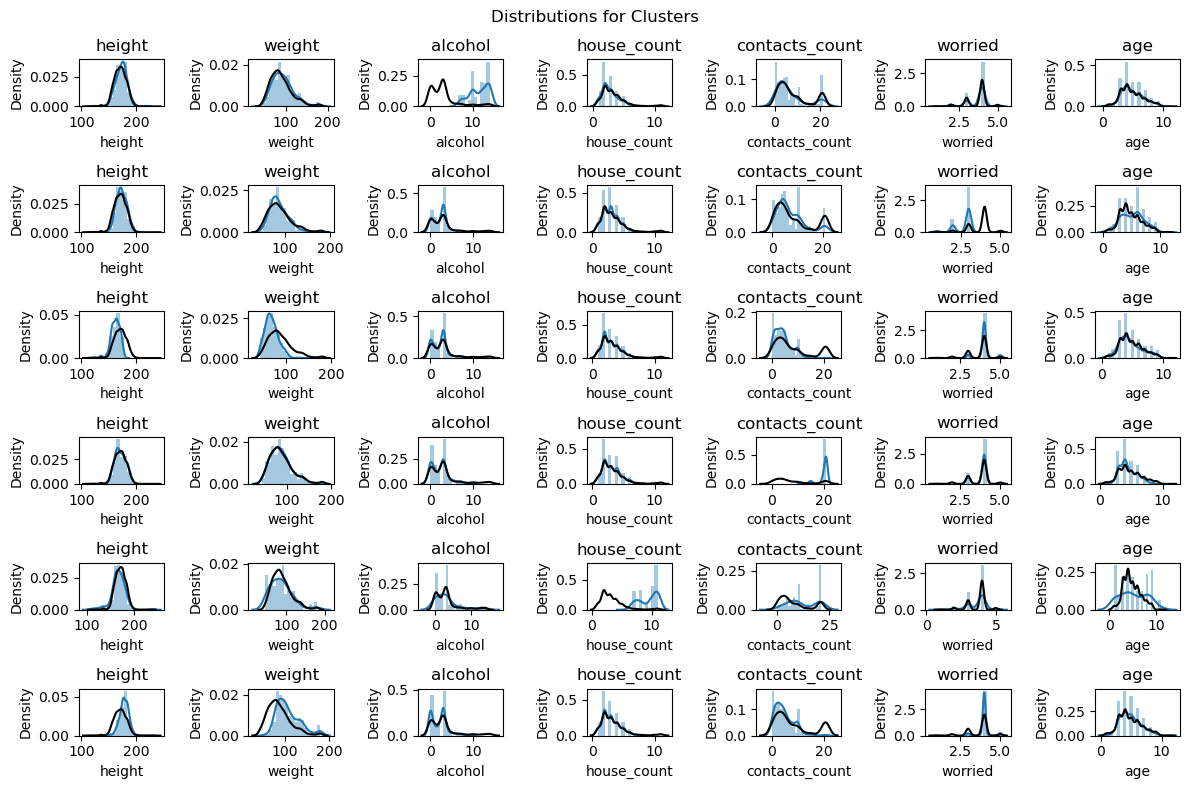

In [32]:
cols = ['height', 'weight', 'alcohol', 'house_count', 'contacts_count', 'worried','age']
n_bins = 20

# Inspecting clusters 0,1,2,3,4 and 5
clusters_to_inspect = [0,1,2,3,4,5]
num_clusters = len(clusters_to_inspect)

# Create subplots for each cluster
fig, axes = plt.subplots(num_clusters, len(cols), figsize=(12, 8))
fig.suptitle("Distributions for Clusters")

for i, cluster in enumerate(clusters_to_inspect):
    print("Distribution for cluster {}".format(cluster))
    
    for j, col in enumerate(cols):
        # Create the bins
        bins = np.linspace(min(cat_df[col]), max(cat_df[col]), 20)

        # Plot distribution of the cluster using histogram
        sns.distplot(cat_df[cat_df['Cluster_ID'] == cluster][col], bins=bins, ax=axes[i, j], norm_hist=True)
             
        # Plot the normal distribution with a black line
        sns.distplot(cat_df[col], bins=bins, ax=axes[i, j], hist=False, color="k")

        axes[i, j].set_title(col)

plt.tight_layout()
plt.show()